In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ds=pd.read_csv("Mall_Customers.csv")

In [ ]:
ds.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMean_labels
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,2
3,0,23,16,77,1
4,0,31,17,40,2
5,0,22,17,76,1
6,0,35,18,6,2
7,0,23,18,94,1
8,1,64,19,3,0
9,0,30,19,72,1


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


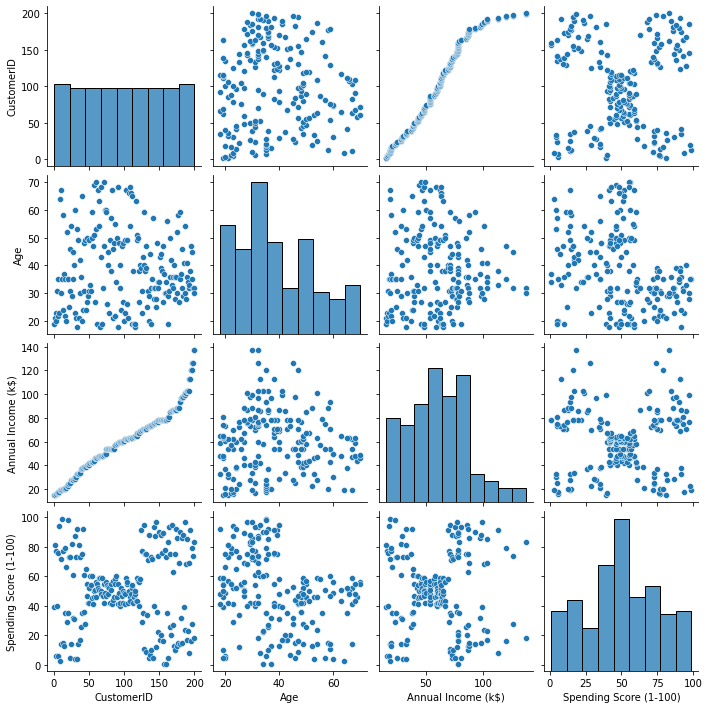

In [ ]:
sns.pairplot(ds)

In [ ]:
# ds=ds.drop(['CustomerID'],axis=1)

In [ ]:
ds.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
x=ds.iloc[:,0]
x

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()
ds['Gender']=labelencoder_x.fit_transform(ds['Gender'])

In [ ]:
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


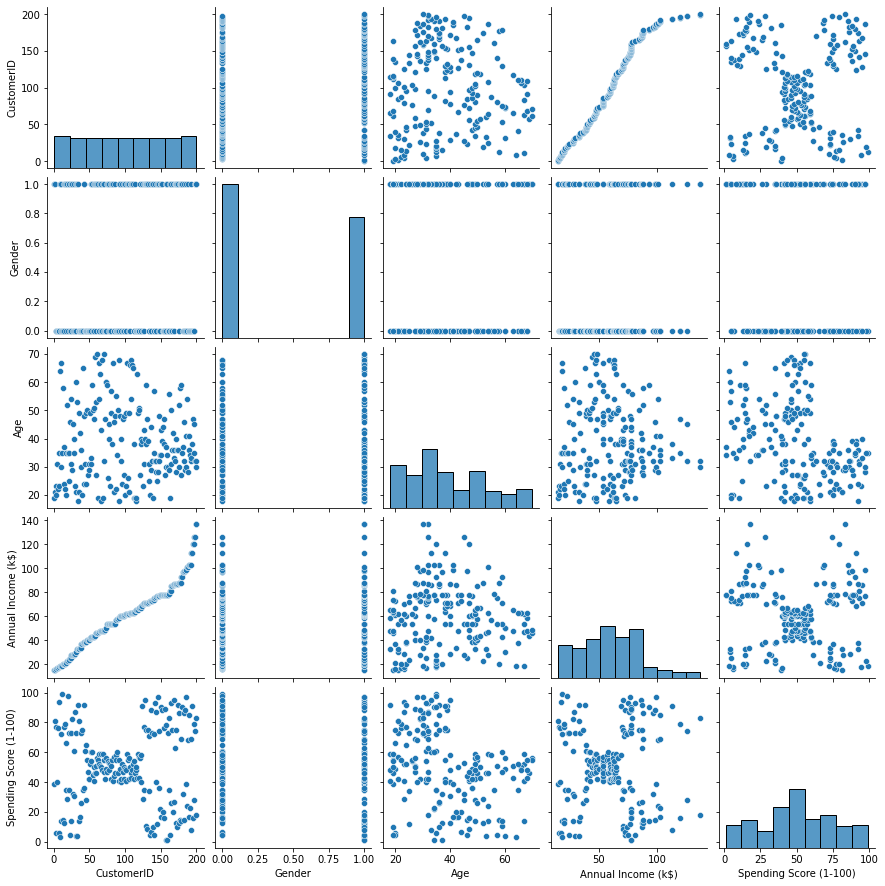

In [ ]:
sns.pairplot(ds)

In [ ]:
px.scatter(data_frame=ds, x='Spending Score (1-100)', y='Annual Income (k$)',size='Age',text='Gender',  color='Age')

In [ ]:
corr_matrix=ds.drop(['CustomerID'],axis=1).corr()
corr_matrix

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
ds_scaled = StandardScaler().fit_transform(ds)

In [ ]:
ds_scaled

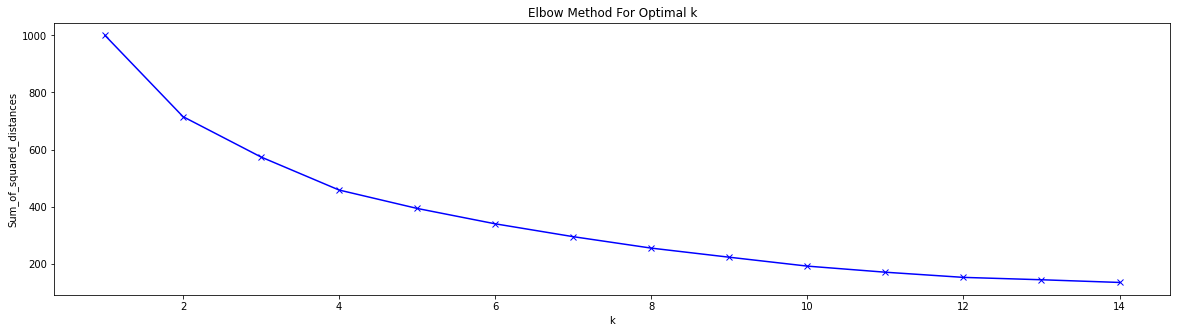

In [ ]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(ds_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

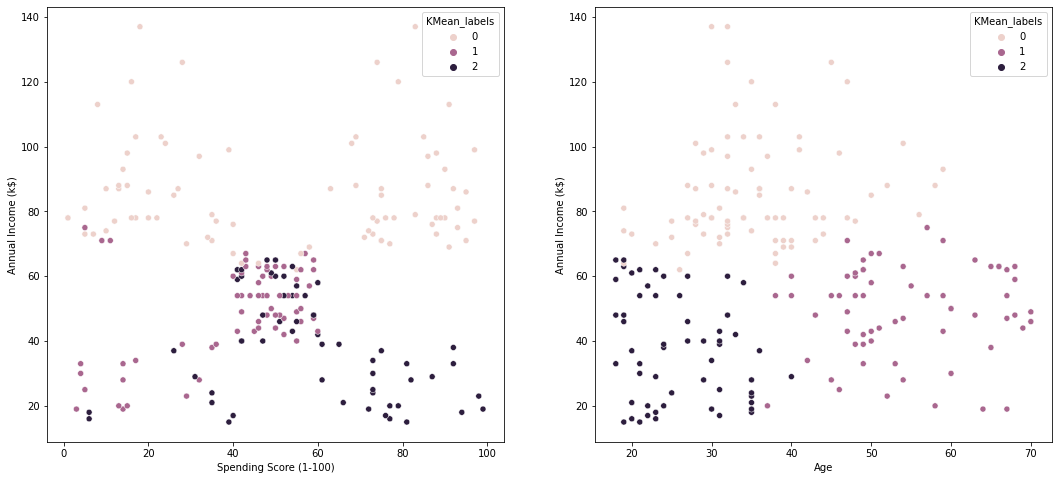

In [ ]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(ds_scaled)
ds['KMean_labels']=model.labels_
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(18,8))
sns.scatterplot(data=ds, x='Spending Score (1-100)', y='Annual Income (k$)', hue='KMean_labels', ax=ax[0])
sns.scatterplot(data=ds, x='Age', y='Annual Income (k$)', hue='KMean_labels', ax=ax[1])
# sns.scatterplot(data=ds, x='child_mort', y='health', hue='KMean_labels', ax=ax[2])

In [ ]:
ds.groupby(['KMean_labels','CustomerID']).mean()

Gender  ...  Spending Score (1-100)
KMean_labels CustomerID          ...                        
0            104              1  ...                      55
             113              0  ...                      42
             114              1  ...                      46
             121              1  ...                      56
             122              0  ...                      40
...                         ...  ...                     ...
2            101              0  ...                      41
             106              0  ...                      42
             112              0  ...                      54
             115              0  ...                      48
             116              0  ...                      50

[200 rows x 4 columns]

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(ds_scaled,labels=model.labels_)

0.25951265087431563